In [1]:
# returns frequency of G's and C's in the sequence
def calculate_gc_content(sequence):
    c = sequence.count('C')
    g = sequence.count('G')
    return (c + g) / len(sequence)

In [3]:
# test the function to make sure it works
calculate_gc_content("GCGCAAAA")

0.5

In [4]:
human_genome_filepath = './GCF_000001405.39_GRCh38.p13_cds_from_genomic.fna'
human_genome_file = open(human_genome_filepath)
human_genome_file.close()

In [5]:
def parse_fasta_file(input_file):
    """Return a dict of {id:gene_seq} pairs based on the sequences in the input FASTA file
    input_file -- a file handle for an input fasta file
    """
    parsed_seqs = {}
    curr_seq_id = None
    curr_seq = []

    for line in f:
        line = line.strip()

        if line.startswith(">"):
            if curr_seq_id is not None:
                parsed_seqs[curr_seq_id] = ''.join(curr_seq)

            curr_seq_id = line[1:]
            curr_seq = []
            continue

        curr_seq.append(line)

    #Add the final sequence to the dict
    parsed_seqs[curr_seq_id] = ''.join(curr_seq)
    return parsed_seqs

In [6]:
input_file = human_genome_filepath

f = open(input_file)
parsed_seqs = parse_fasta_file(input_file)
print("Done parsing genome")

Done parsing genome


In [8]:
gc_contents = {}
seq_lengths = {}

for gene_id, sequence in parsed_seqs.items():
    
    # Run our function
    gc_content = calculate_gc_content(sequence)
    length = len(sequence)
    
    #Save the results in dictionaries for later use
    gc_contents[gene_id] = gc_content
    seq_lengths[gene_id] = length

total_genes = len(gc_contents)
print(f"Done calculating GC dinucleotide frequency for {total_genes} ...")

Done calculating GC dinucleotide frequency for 124038 ...


In [10]:
length_vals = []
gc_vals = []

for gene_id, gc_val in gc_contents.items():
    length_vals.append(seq_lengths[gene_id])
    gc_vals.append(gc_val)

In [11]:
n_examples = 10
example_length_values = length_vals[0:n_examples]
example_gc_values = gc_vals[0:n_examples]
print(f"Example gc values: {example_gc_values}")
print(f"Example length values: {example_length_values}")

Example gc values: [0.4260958205912334, 0.5446623093681917, 0.5489021956087824, 0.46006389776357826, 0.6897470039946738, 0.46006389776357826, 0.46006389776357826, 0.46006389776357826, 0.46006389776357826, 0.46006389776357826]
Example length values: [981, 459, 501, 939, 2253, 939, 939, 939, 939, 939]


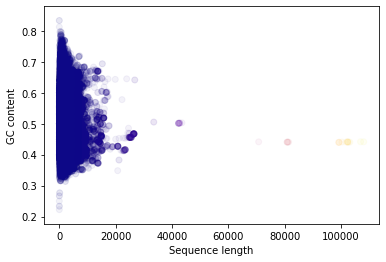

In [14]:
import matplotlib.pyplot as plt
xs = length_vals
ys = gc_vals

colors = [((x - y)**2) for x,y in zip(xs,ys)]

#Build the scatter plot
plt.scatter(xs,ys,c=colors,cmap = 'plasma',alpha = 0.05)

#Add x and y labels
plt.xlabel("Sequence length")
plt.ylabel("GC content")



#Show the plot
plt.show()